In [1]:
#import winsound as sd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import string

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

import pickle
import os

In [2]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)

with open(path+'//Data_final16_v2.pkl', 'rb') as file:
    Data = pickle.load(file)   
    Datalen = pickle.load(file)    
    # Granule cell firing rate for data(812개)
    DG_FR = pickle.load(file)
    
    # 각 data의 DG output size(길이)
    DGlen_list = pickle.load(file)
    # 적당한 길이에 따라 index로 분류(453개)
    DGlen_idx = pickle.load(file)
    DGlen_idx_excluded = pickle.load(file)
    
    # 각 pair에 대한 input/output overlap값과 index
    OverI = pickle.load(file)
    OverO = pickle.load(file)
    Pair_idx = pickle.load(file)
    
    # 길이로 분류한 pair에 대한 input/output overlap값과 index
    OverI_v2 = pickle.load(file)
    OverO_v2 = pickle.load(file)
    Pair_idx_v2 = pickle.load(file)
    
with open(path+'//Data_final16_v2-CA3.pkl', 'rb') as file:
    # 453개의 data에 해당하는 input vector, DG vector, DG vector size, 
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    # CA3 vector index, CA3i vector index
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    # 뭐였더라
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [3]:
def choice_neurons(layer, N):
    n_index = []
    num = random.randrange(0,layer)
    #N_R = np.random.randint(1, N)
    for n in range(N):
        while num in n_index:
            num = random.randrange(0,layer)
        n_index.append(num)
    n_index.sort()
    return n_index

In [4]:
with open('Figure_spiking_retrieval_F.pkl', 'rb') as file:
    network = pickle.load(file)
    FT = pickle.load(file)
    Voltage = pickle.load(file)

In [5]:
FT_rh = []
for N in range(9):
    FT_rh_temp = FT[N][0]
    for n in range(9):
        FT_rh_temp = np.concatenate((FT_rh_temp, FT[N][n+1]), axis=1)
    FT_rh.append(FT_rh_temp)
    
for N in range(9):
    FT_rh[N] = FT_rh[N]

In [6]:
final_list = [249, 423, 80, 422, 228, 219, 517, 111, 346, 509]

In [7]:
for i, comp in enumerate(final_list):
    print(np.where(Filt_idata[:,comp]))

(array([ 2,  4, 15], dtype=int64),)
(array([ 3,  5,  7,  8,  9, 10, 13, 14], dtype=int64),)
(array([ 0,  5,  7, 14], dtype=int64),)
(array([ 1,  3,  4,  5,  7, 11, 13, 15], dtype=int64),)
(array([ 0,  1,  4,  6,  7,  8,  9, 10, 11, 13, 14, 15], dtype=int64),)
(array([3], dtype=int64),)
(array([ 1,  2,  4,  6,  7,  9, 10, 13, 14], dtype=int64),)
(array([0, 8], dtype=int64),)
(array([ 1,  7,  8, 10, 11, 13, 14], dtype=int64),)
(array([ 0, 10, 12], dtype=int64),)


In [8]:
CA3_idx_set = set()
for i, comp in enumerate(final_list):
    CA3_idx_set |= set(Af_py[comp])
print(len(CA3_idx_set))

Phase_N = 1
CA3_FT = FT_rh[6][:,240*(Phase_N):240*(Phase_N+1)]
CA3_FT_Flist = []
CA3_FT_idx = []
# comp : 선별된 CA3 idx
# i : 선별된 CA3 새 idx
# temp : 각 idx가 발화한 시간 리스트 / comp2 : 각 idx가 발화한 시간
for i, comp in enumerate(CA3_idx_set):
    temp = np.where(CA3_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        CA3_FT_Flist.append([i,comp2])
        CA3_FT_idx.append([i,comp])
        
for i, comp in enumerate(CA3_FT_Flist):
    CA3_FT_Flist[i] = [comp[0],comp[1]-120]

104


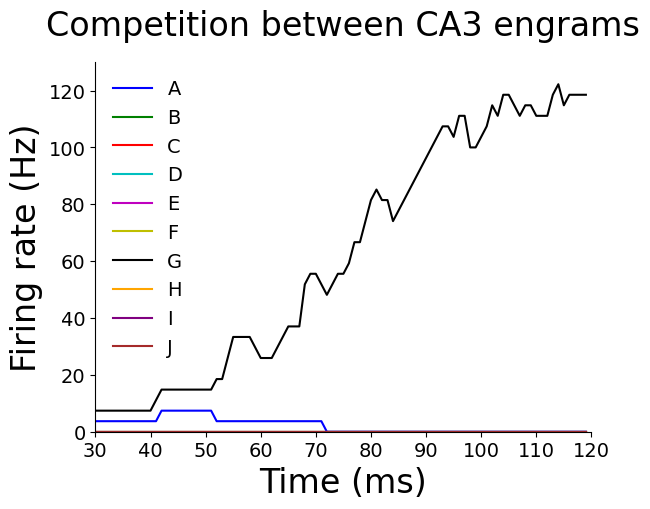

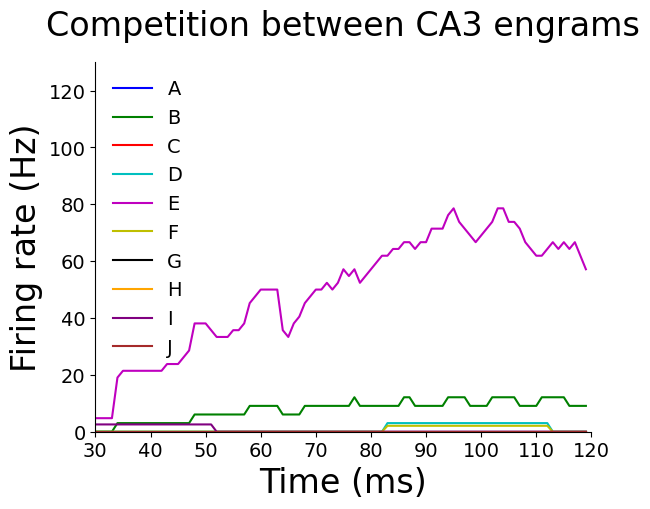

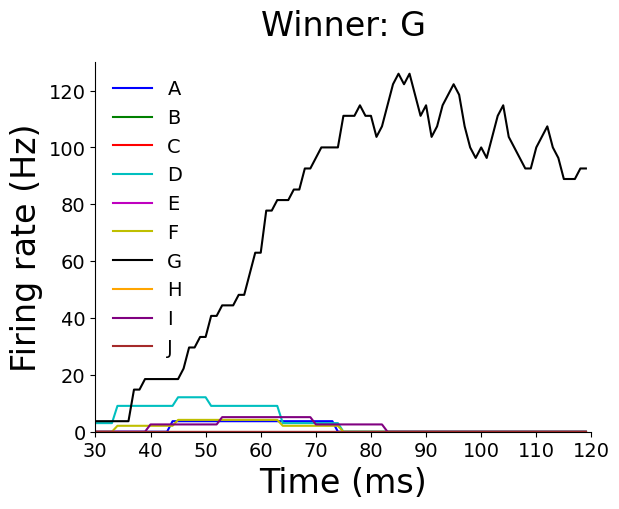

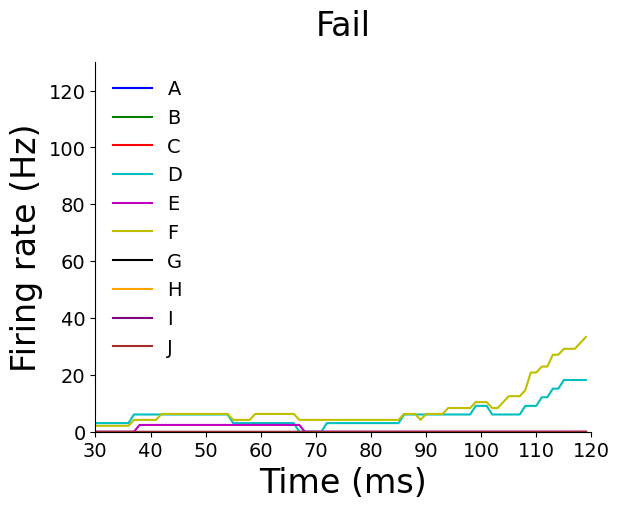

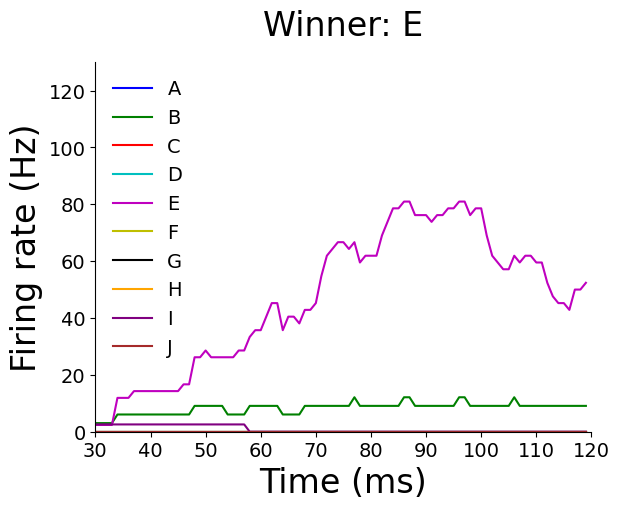

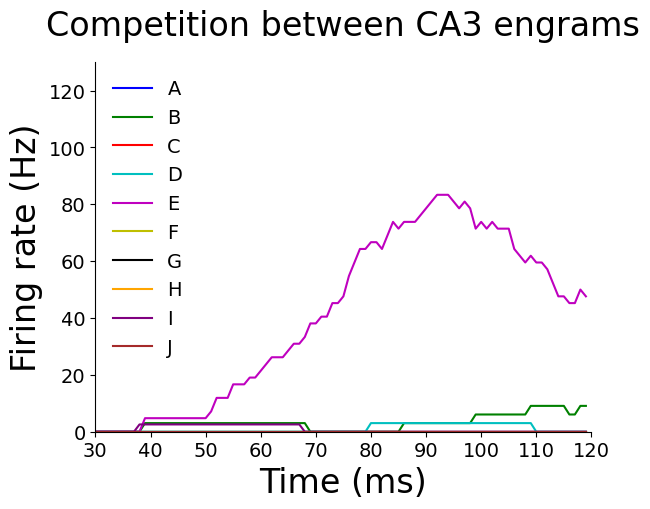

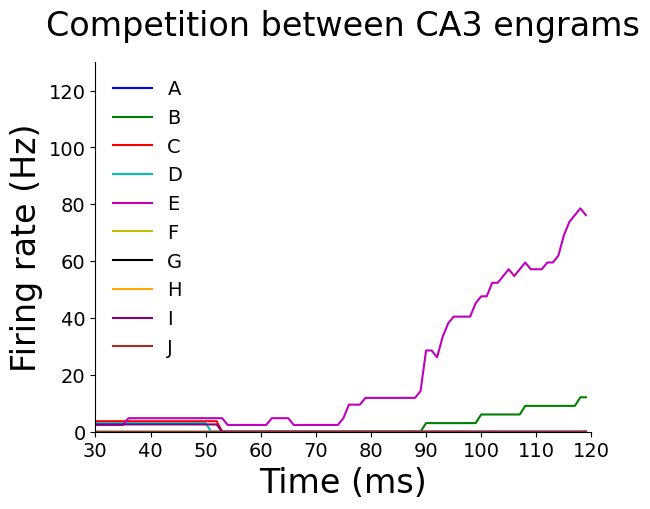

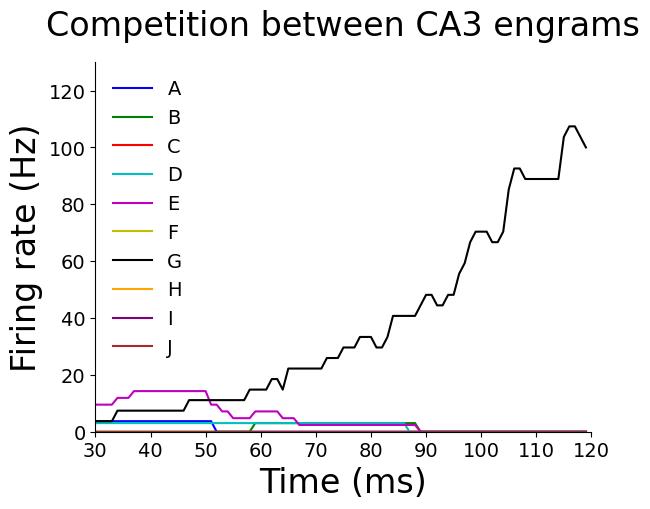

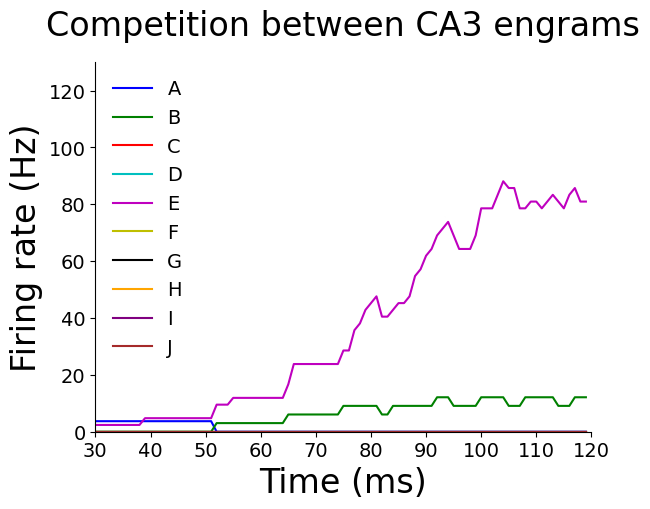

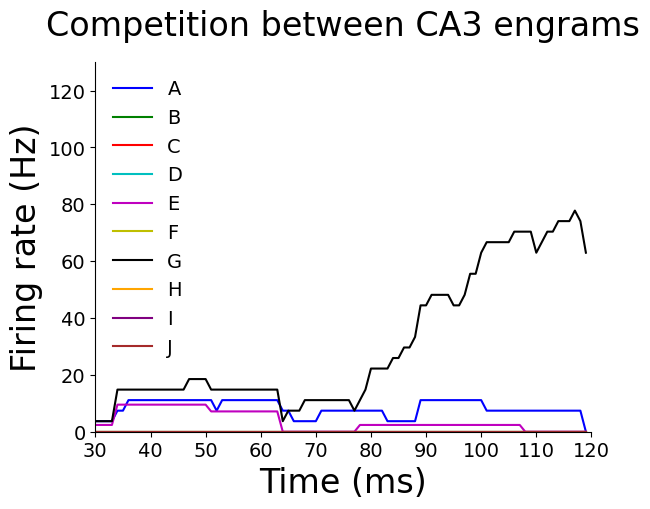

In [9]:
for f in range(10):

    Phase_N = f
    CA3_FT = FT_rh[6][:,240*(Phase_N):240*(Phase_N+1)]
    CA3_FT_Flist = []
    CA3_FT_idx = []
    # comp : 선별된 CA3 idx
    # i : 선별된 CA3 새 idx
    # temp : 각 idx가 발화한 시간 리스트 / comp2 : 각 idx가 발화한 시간
    for i, comp in enumerate(CA3_idx_set):
        temp = np.where(CA3_FT[comp,:])[0]
        for j, comp2 in enumerate(temp):
            CA3_FT_Flist.append([i,comp2])
            CA3_FT_idx.append([i,comp])

    for i, comp in enumerate(CA3_FT_Flist):
        CA3_FT_Flist[i] = [comp[0],comp[1]-120]

    window = 30 # ms
    FR_matrix = np.zeros((len(final_list),120-window))

    for n in range(2400):
        for t in range(240):
            for i, comp in enumerate(final_list):
                if CA3_FT[n,t] !=0 and n in Af_py[comp]:
                    # 각 시점 T를 기준으로한 window
                    for T in range(120-window):   
                        # 이 window 안에 조건을 만족하는 t가 있으면
                        if T <= t-120 < T+window:
                            FR_matrix[i,T] +=1

    for i, comp in enumerate(final_list):
        FR_matrix[i,:] = (FR_matrix[i,:]/(0.001*window))/len(Af_py[comp])

    color_map = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
    labels = list(string.ascii_uppercase)[:10]
    
    x = np.array(range(30,120))
    fig = plt.subplot(111)
    for n in range(10):
        plt.plot(x, FR_matrix[n,:], color=color_map[n])
    plt.legend(labels, loc='upper left', frameon=False, fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Time (ms)', fontsize=24)
    plt.ylabel('Firing rate (Hz)', fontsize=24)
    if f == 2:
        plt.title('Winner: G', fontsize=24, y=1.05)
    elif f == 4:
        plt.title('Winner: E', fontsize=24, y=1.05)
    elif f == 3:
        plt.title('Fail', fontsize=24, y=1.05)
    else:
        plt.title('Competition between CA3 engrams', fontsize=24, y=1.05)
    plt.xlim([30,120])
    plt.ylim([0,130])
    fig.spines['top'].set_visible(False)
    fig.spines['right'].set_visible(False)
    plt.savefig('Firing rate for each engram in CA3-%d.pdf' %f, bbox_inches='tight')
    plt.show()

In [10]:
a

NameError: name 'a' is not defined

In [ ]:
# Heatmap using Seaborn
aspect_ratio = Rc_matrix.shape[1] / Rc_matrix.shape[0]
plt.figure(figsize=(10, 10 / aspect_ratio))
fig = sns.heatmap(Rc_matrix, cmap=cmap, vmax=5)
fig.invert_yaxis()
idx_list = [0,26,52,78,104]
fig.set_xticks(idx_list)
fig.set_xticklabels(idx_list)
plt.xticks(rotation=0)
fig.set_yticks(idx_list)
fig.set_yticklabels(idx_list)
plt.yticks(rotation=0)
for _, spine in fig.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_edgecolor('black') 
plt.title('Connection Weights (Recurrent collateral)')
plt.xlabel('Postsynaptic Neuron')
plt.ylabel('Presynaptic Neuron')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
ㅁ

In [ ]:
Target_engram_idx = 6
Target_engram = []
for i, comp in enumerate(CA3_FT_idx):
    if comp[1] in Af_py[final_list[Target_engram_idx]]:
        Target_engram.append(comp[0])
Target_engram = list(set(Target_engram))

In [ ]:
engram_mapping = np.zeros(len(CA3_idx_set), dtype=int)
engram_mapping[Target_engram] = 1
num_engrams = max(engram_mapping) + 1
# Create a color palette for engrams using Seaborn
# palette = sns.color_palette("muted", num_engrams)
palette = ['r', 'k']

In [ ]:
def plot_vlines(ax, data, title, N_layer, size, ticks):
    for neuron_idx, spike_time in data:
        engram_id = engram_mapping[neuron_idx]
        color = palette[engram_id]
        ax.vlines(spike_time, neuron_idx - size, neuron_idx + size, colors=color)
    ax.ylabel(title)
    ax.ylim([0,N_layer])
    ax.xlim([0,125])
    ax.grid(False)

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title('Retrieval')
plot_vlines(plt, CA3_FT_Flist, 'CA3 (Exc)', len(CA3_idx_set), 1, [0,52,104])
plt.xlabel('Time(ms)')
plt.savefig('Spikes figure during competition.png', bbox_inches='tight')
plt.show()

In [ ]:
a

In [ ]:
final_list = [249, 423, 80, 422, 228, 219, 517, 111, 346, 509]

In [ ]:
DG_idx_set = set()
for i, comp in enumerate(final_list):
    DG_idx_set |= set(np.where(Filt_gdata[:,comp])[0])
print(len(DG_idx_set))

In [ ]:
CA3_idx_set = set()
for i, comp in enumerate(final_list):
    CA3_idx_set |= set(Af_py[comp])
print(len(CA3_idx_set))

In [ ]:
engram_mapping = np.zeros(network.N_CA3, dtype=int)
for n in range(10):
    engram_mapping[Af_py[final_list[n]]] = n
num_engrams = max(engram_mapping) + 1

In [ ]:
def plot_vlines(ax, data, title, N_layer, color, size, ticks):
    for neuron_idx, spike_time in data:
        engram_id = 0       
        ax.vlines(spike_time, neuron_idx - size, neuron_idx + size, colors=color)
    ax.set_ylabel(title)
    ax.yaxis.set_label_coords(-0.05, 0.5)
    ax.set_yticks(ticks)
    ax.set_xlim([0,2500])
    ax.set_ylim([0,N_layer])
    ax.grid(False)

In [ ]:
with open('Figure_spiking_retrieval3.pkl', 'rb') as file:
    network = pickle.load(file)
    FT = pickle.load(file)
    Voltage = pickle.load(file)

In [ ]:
ㅁ

In [ ]:
FT_rh = []
for N in range(9):
    FT_rh_temp = FT[N][0]
    for n in range(9):
        FT_rh_temp = np.concatenate((FT_rh_temp, FT[N][n+1]), axis=1)
    FT_rh.append(FT_rh_temp)
    
for N in range(9):
    FT_rh[N] = FT_rh[N][:,125:]

In [ ]:
# CA at retrieval
CA3_FT = FT_rh[6]
CA3_FT_list = []
for i in range(FT_rh[6].shape[0]):
    temp = np.where(CA3_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA3_FT_list.append([i,comp])

CA3_FT_Flist = []
for i, comp in enumerate(CA3_idx_set):
    temp = np.where(CA3_FT[comp,:])[0]
    for j, comp2 in enumerate(temp):
        CA3_FT_Flist.append([i,comp2])

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 1, figsize=(10, 12), sharex=True)
fig.suptitle('Retrieval')

plot_vlines(axs, CA3_FT_Flist, 'CA3 (Exc)', len(CA3_idx_set), 'black', 0.8, [0,52,104])

plt.xlabel('Time(ms)')
plt.savefig('Spikes figure at retrieval.png', bbox_inches='tight')
plt.show()

In [ ]:
a

In [ ]:
# Bias 조사
with open('Cue_and_Target_Bias.pkl', 'rb') as file:
    Target_Data = pickle.load(file)
    Cue_Data = pickle.load(file)
    
learned_path = path+'//module//Weights_Bias'

In [ ]:
custom_palette = sns.color_palette("deep", 15)
sns.palplot(custom_palette)

In [ ]:
In_FT = FT[0]
In_FT_list = []
for i in range(16):
    temp = np.where(In_FT[i,:])[0]
    for j, comp in enumerate(temp):
        In_FT_list.append([i,comp])

In [ ]:
neuron_idx

In [ ]:
engram_mapping = np.zeros(network.N_I, dtype=int)
num_engrams = max(engram_mapping) + 1

# Create a color palette for engrams using Seaborn
palette = sns.color_palette("muted", num_engrams)

# Setting the plot style using Seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 4))
for neuron_idx, spike_time in In_FT_list:
    engram_id = engram_mapping[neuron_idx]
    color = palette[engram_id]
    
    plt.vlines(spike_time, neuron_idx - 0.1, neuron_idx + 0.1, colors=color)
    
plt.xlim([0,130])
plt.ylim([0,network.N_I])
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.title('Spike Raster Plot with Different Engrams')
plt.show()

In [ ]:
CA3_FT = FT[3]
CA3_FT_list = []
for i in range(network.N_CA3):
    temp = np.where(CA3_FT[i,:])[0]
    for j, comp in enumerate(temp):
        CA3_FT_list.append([i,comp])

In [ ]:
np.full((16),1)

In [ ]:
engram_mapping = np.zeros(network.N_CA3, dtype=int)
engram_mapping[Af_py[0]] = 1
engram_mapping[Af_py[12]] = 2
num_engrams = max(engram_mapping) + 1

# Create a color palette for engrams using Seaborn
palette = sns.color_palette("muted", num_engrams)

# Setting the plot style using Seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 4))
for neuron_idx, spike_time in CA3_FT_list:
    engram_id = engram_mapping[neuron_idx]
    color = palette[engram_id]
    
    plt.vlines(spike_time, neuron_idx - 12, neuron_idx + 12, colors=color)
    
plt.xlim([0,130])
plt.ylim([0,network.N_CA3])
plt.xlabel('Time(ms)')
plt.ylabel('Neuron Index')
plt.title('Competition in CA3')
plt.show()